In [33]:
# Load necessary libraries
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt



In [ ]:
# Open fire perimeters and EJI data and do initial exploration
eaton_perimeters = gpd.read_file("data/Eaton_Perimeter_20250121.shp")
palisades_perimeters = gpd.read_file("data/Palisades_Perimeter_20250121.shp")

eji_data = gpd.read_file("data/EJI_2024_California.gdb")


In [ ]:
# Do some data exploration
print(eaton_perimeters.head())
#print(palisades_perimeters.head())
print(eji_data.head())

print(palisades_perimeters.crs)
print(eji_data.crs)

# Project EJI data to match palisades fire perimeter CRS
eji_data = eji_data.to_crs(palisades_perimeters.crs)

print(eji_data.crs)

   OBJECTID            type    Shape__Are  Shape__Len  \
0         1  Heat Perimeter   2206.265625  270.199719   
1         2  Heat Perimeter  20710.207031  839.204218   
2         3  Heat Perimeter   3639.238281  250.304502   
3         4  Heat Perimeter   1464.550781  148.106792   
4         5  Heat Perimeter   4132.753906  247.960744   

                                            geometry  
0  POLYGON ((-13146936.686 4051222.067, -13146932...  
1  POLYGON ((-13150835.463 4052713.929, -13150831...  
2  POLYGON ((-13153094.697 4053057.596, -13153113...  
3  POLYGON ((-13145097.740 4053118.235, -13145100...  
4  POLYGON ((-13153131.126 4053196.882, -13153131...  
   OBJECTID STATEFP COUNTYFP TRACTCE             AFFGEOID        GEOID  \
0     11620      06      077  005127  140000US06077005127  06077005127   
1     11557      06      077  003406  140000US06077003406  06077003406   
2     11594      06      077  004402  140000US06077004402  06077004402   
3     11617      06      077  0

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Census Tracts Intersecting Palisades Fire Perimeter')

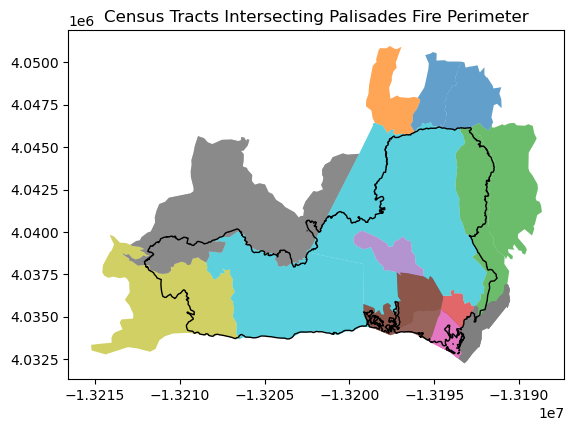

In [ ]:
# only keep census tract that intersect palisades fire
eji_palisades = gpd.sjoin(eji_data, palisades_perimeters, predicate = "intersects")

# Map showing census tracts that intersect the palisades fire perimeter
# Assign different color for each tract
ax = eji_palisades.plot(column='TRACTCE', alpha=0.7)
palisades_perimeters.plot(ax = ax, color='none', edgecolor='black', figsize=(10,10))
ax.set_title("Census Tracts Intersecting Palisades Fire Perimeter") 



Text(0.5, 1.0, 'Census Tracts Intersecting Eaton Fire Perimeter')

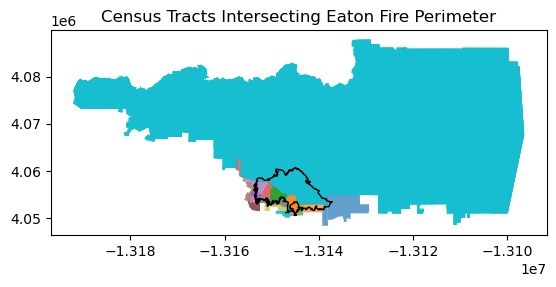

In [31]:
# only keep census tract that intersect palisades fire
eji_eaton = gpd.sjoin(eji_data, eaton_perimeters, predicate = "intersects")

# Map showing census tracts that intersect the palisades fire perimeter
# Assign different color for each tract
ax = eji_eaton.plot(column='TRACTCE', alpha=0.7)
eaton_perimeters.plot(ax = ax, color='none', edgecolor='black', figsize=(10,10))
ax.set_title("Census Tracts Intersecting Eaton Fire Perimeter")

In [40]:
# Clip eji_palisades to only the area within the palisades fire perimeter
eji_clip_palisades = gpd.clip(eji_palisades, palisades_perimeters)

# Clip eji_eaton to only the area within the eaton fire perimeter
eji_clip_eaton = gpd.clip(eji_eaton, eaton_perimeters)

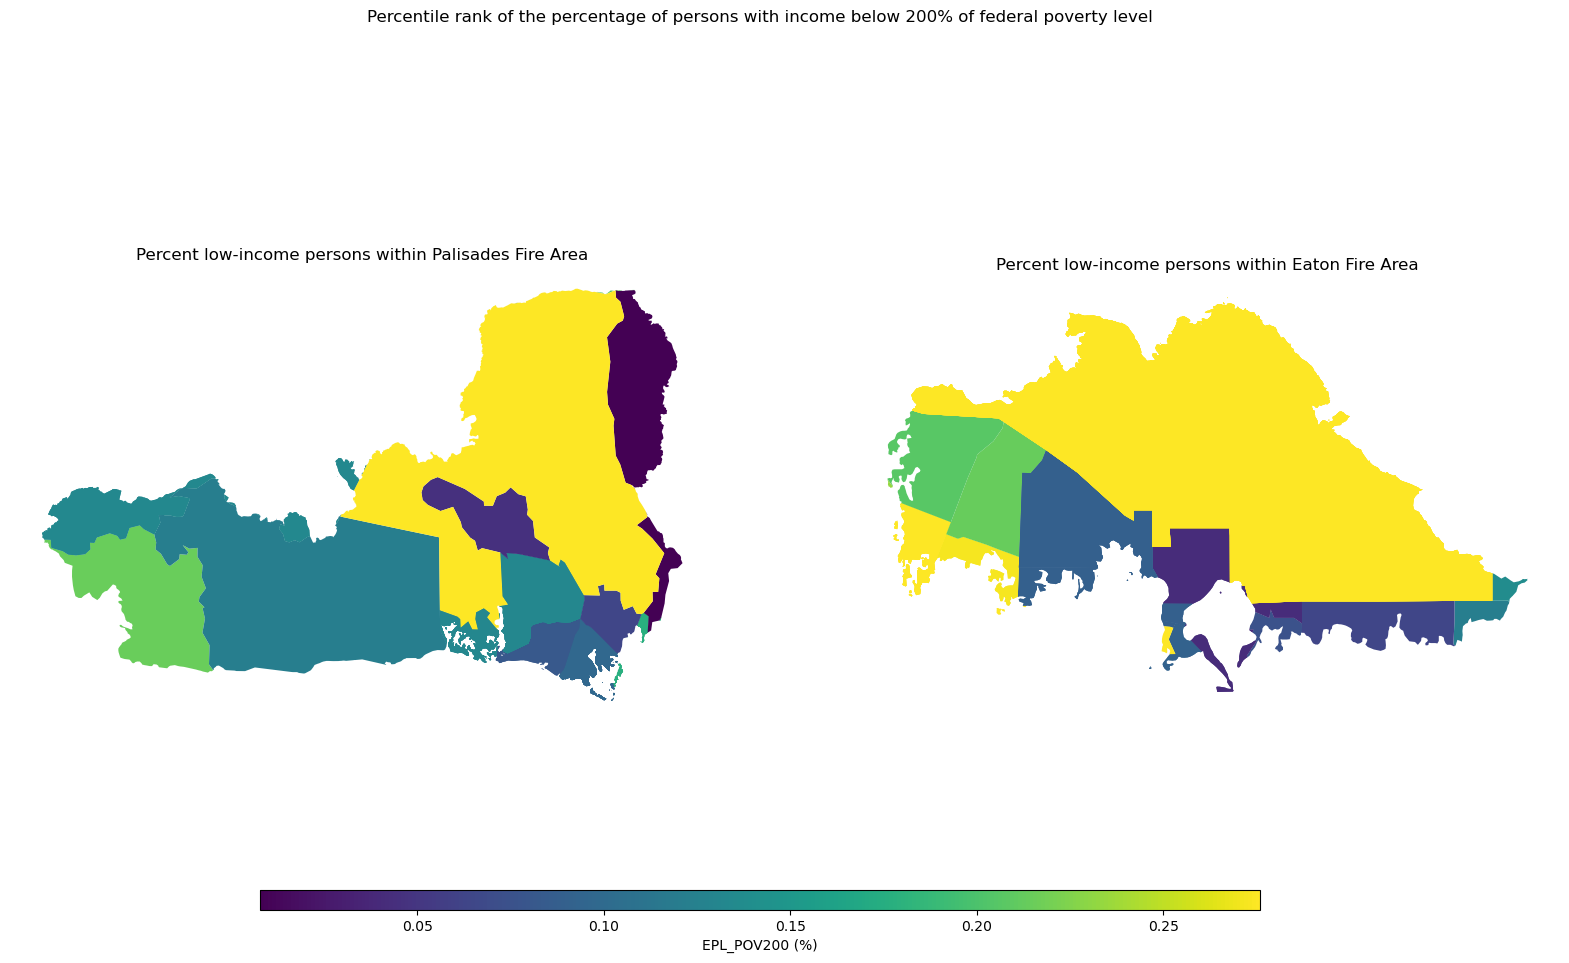

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'EPL_POV200'

# Find common min/max for legend range
vmin = min(eji_palisades[eji_variable].min(), eji_palisades[eji_variable].min())
vmax = max(eji_palisades[eji_variable].max(), eji_palisades[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_clip_palisades.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title("Percent low-income persons within Palisades Fire Area")
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_clip_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Percent low-income persons within Eaton Fire Area')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentile rank of the percentage of persons with income below 200% of federal poverty level')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('EPL_POV200 (%)')

plt.show()